# Screen Time Mental Health EDA

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA

pd.set_option('max_row',2000)
pd.set_option('max_column',300)

base_dir = os.path.join(os.getcwd(), os.pardir)

Get the dataframe

In [2]:
csv_path = os.path.join(base_dir, "/Users/Egbert/Desktop/ADS/maps-synthetic-data-v1.1.csv")

df = pd.read_csv(csv_path, index_col="X")
df = df.drop(df.columns[0], axis=1)
df.head()

,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,NaN,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Yes,Yes,Yes,4,No,No,No,11.0,No,No,No,III (manual),ii,A level,A level,0.0,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~3%,~3%,5 or more times a week,No,NaN,NaN,NaN,NaN,NaN,No ICD-10 diagnosis of depression,0.0,0.0,0.0,NaN,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,No,No,No,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,No,No,No,III (manual),iv,O level,O level,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,III (manual),i,O level,A level,0.0,NaN,NaN,<0.1%,NaN,NaN,NaN,~0.5%,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,NaN,Not at all,Not at all,Not at all,Less than 1 hour,Not at all,1 or more hours,1-2 hours,3 or more hours,Not at all,Less than 3 hours,3 or more hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,Not at all,Not at all,Not at all,1-2 hours,Not at all,1 or more hours,1-2 hours,1-2 hours,Not at all,3 or more hours,1-2 hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,NaN,NaN,No,4,No,No,No,9.0,Yes,No,No,III (manual),iv,A level,A level,1.0,<0.1%,<0.1%,<0.1%,NaN,~3%,~0.5%,~0.5%,NaN,1-4 times a week,No,Not at all,Not at all,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A


In [3]:
df.columns

Index(['flag', 'comp_bed_9', 'mat_dep', 'mat_age', 'weight_16', 'height_16',
       'iq', 'comp_noint_bed_16', 'comp_int_bed_16', 'talk_phon_wend',
       'text_wend', 'talk_mob_wend', 'comp_wend', 'musi_wend', 'read_wend',
       'work_wend', 'alon_wend', 'draw_wend', 'play_wend', 'tv_wend',
       'out_win_wend', 'out_sum_wend', 'tran_wend', 'talk_phon_week',
       'text_week', 'talk_mob_week', 'comp_week', 'musi_week', 'read_week',
       'work_week', 'alon_week', 'draw_week', 'play_week', 'tv_week',
       'out_win_week', 'out_sum_week', 'tran_week', 'pat_pres_10',
       'pat_pres_8', 'pat_pres', 'num_home', 'mat_anx_1', 'mat_anx_18m',
       'mat_anx_8m', 'agg_score', 'emot_cruel', 'phys_cruel', 'mat_anx_0m',
       'pat_ses', 'mat_ses', 'pat_edu', 'mat_edu', 'parity', 'dep_band_15',
       'dep_band_13', 'dep_band_10', 'dep_band_07', 'anx_band_15',
       'anx_band_13', 'anx_band_10', 'anx_band_07', 'exercise', 'child_bull',
       'phone_14_wend', 'phone_14_week', 'musi_13', '

### Correlation

Look at the correlation between each feature.

In [4]:
df.corr()

,mat_dep,weight_16,height_16,iq,agg_score,parity,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score
mat_dep,1.000000,0.022857,-0.037471,-0.076213,-0.399370,0.072405,0.042720,0.049515,0.044806,0.036001,0.042168
weight_16,0.022857,1.000000,0.506162,-0.010114,-0.023589,0.023191,-0.045174,-0.032918,-0.014801,-0.044244,-0.014034
height_16,-0.037471,0.506162,1.000000,0.108182,-0.006108,-0.000875,-0.058494,-0.042952,-0.016259,-0.049831,-0.034491
iq,-0.076213,-0.010114,0.108182,1.000000,0.064654,-0.075945,-0.002553,-0.011164,-0.003665,-0.024857,0.007587
agg_score,-0.399370,-0.023589,-0.006108,0.064654,1.000000,-0.040754,-0.015039,-0.026265,-0.062852,-0.036543,-0.040472
parity,0.072405,0.023191,-0.000875,-0.075945,-0.040754,1.000000,0.045679,0.036739,0.022520,0.039167,0.036022
secd_diag,0.042720,-0.045174,-0.058494,-0.002553,-0.015039,0.045679,1.000000,0.761506,0.517815,0.544721,0.617543
prim_diag,0.049515,-0.032918,-0.042952,-0.011164,-0.026265,0.036739,0.761506,1.000000,0.324851,0.632179,0.725219
panic_score,0.044806,-0.014801,-0.016259,-0.003665,-0.062852,0.022520,0.517815,0.324851,1.000000,0.200793,0.238634
dep_thoughts,0.036001,-0.044244,-0.049831,-0.024857,-0.036543,0.039167,0.544721,0.632179,0.200793,1.000000,0.610364


Note: 
- not all feature included as many features are categorical (string) type
- NaN types ignored

## Categorical feature handling

Look at the feature data types

In [5]:
for dtype in df.dtypes:
    print(dtype)

object
object
float64
object
float64
float64
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
object
object
object
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
float64
float64
float64
object
object
object
object
object
object
object
object
object


Check the cataegorical feature categories.

In [6]:
for col in df:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].unique()}\n")

flag: ['synthetic']

comp_bed_9: [nan 'No' 'Yes']

mat_age: ['30' '26' '24' '22' '31' '36' '27' '21' '32' '< 16' '33' '25' '16' '37'
 '34' '35' '18' '29' '23' '20' '17' '28' '38' nan '40' '19' '39' '41'
 '>43' '42' '43']

comp_noint_bed_16: [nan 'Yes']

comp_int_bed_16: [nan 'Yes']

talk_phon_wend: ['Any at all' nan 'Not at all']

text_wend: ['Less than 1 hour' nan 'Not at all' '3 or more hours' '1-2 hours']

talk_mob_wend: ['Less than 1 hour' nan 'Not at all' '1 or more hours']

comp_wend: ['1-2 hours' nan 'Less than 1 hour' '3 or more hours' 'Not at all']

musi_wend: ['Not at all' nan 'Any at all']

read_wend: ['Less than 1 hour' nan '1 or more hours' 'Not at all']

work_wend: ['3 or more hours' nan '1-2 hours' 'Less than 1 hour']

alon_wend: ['1-2 hours' nan '3 or more hours' 'Less than 1 hour']

draw_wend: ['Not at all' nan 'Less than 1 hour' '1 or more hours']

play_wend: ['3 or more hours' nan 'Less than 3 hours']

tv_wend: ['1-2 hours' nan '3 or more hours' 'Less than 1 hour' 'N

Create a dataframe for the categorical types.

In [7]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df

,flag,comp_bed_9,mat_age,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,synthetic,NaN,30,NaN,NaN,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Yes,Yes,Yes,4,No,No,No,No,No,No,III (manual),ii,A level,A level,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~3%,~3%,5 or more times a week,No,NaN,NaN,NaN,NaN,NaN,No ICD-10 diagnosis of depression,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
2,synthetic,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
3,synthetic,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,III (manual),iv,O level,O level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
4,synthetic,No,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,III (manual),i,O level,A level,NaN,NaN,<0.1%,NaN,NaN,NaN,~0.5%,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
5,synthetic,No,31,Yes,NaN,Not at all,Not at all,Not at all,Less than 1 hour,Not at all,1 or more hours,1-2 hours,3 or more hours,Not at all,Less than 3 hours,3 or more hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,Not at all,Not at all,Not at all,1-2 hours,Not at all,1 or more hours,1-2 hours,1-2 hours,Not at all,3 or more hours,1-2 hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,NaN,NaN,No,4,No,No,No,Yes,No,No,III (manual),iv,A level,A level,<0.1%,<0.1%,<0.1%,NaN,~3%,~0.5%,~0.5%,NaN,1-4 times a week,No,Not at all,Not at all,No,Yes,Yes,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,synthetic,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Every Day","Yes, Every Day","Yes, Every Day",Female,A
13731,synthetic,No,29,NaN,NaN,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Any at all,Less than 1 hour,1-2 hours,3 or more hours,Less than 1 hour,3 or more hours,3 or more hours,3 or more hours,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Le

We can create a feature map using a dictionary to apply feature conversion to feature columns.

In [8]:
feature_map = {    
    "comp_bed_9": {"No": 0, "Yes": 1},
    "mat_age": {"30": 30, "26": 26, "24": 24, "22": 22, "31": 31, "36": 36, "27": 27, "21": 21, "32": 32, "< 16": 15, "33": 33, "25": 25, "16": 16, "37": 37, "34": 34, "35": 35, "18": 18, "29": 29, "23": 23, "20": 20, "17": 17, "28": 28, "38": 38, "40": 40, "19": 19, "39": 39, "41": 31, ">43": 44, "42": 42, "43": 43},
    "comp_noint_bed_16": {"No": 0, "Yes": 1},
    "comp_int_bed_16": {"No": 0, "Yes": 1},
    "talk_phon_wend": {"Not at all": 0, "Any at all": 1},
    "text_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "talk_mob_wend": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "comp_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "musi_wend": {"Not at all": 0, "Any at all": 1},
    "read_wend": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "work_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "alon_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "draw_wend": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "play_wend": {"Less than 3 hours": 0, "3 or more hours": 1},
    "tv_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "out_win_wend": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "out_sum_wend": {"Less than 3 hours": 0, "3 or more hours": 1},
    "tran_wend": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "talk_phon_week": {"Not at all": 0, "Any at all": 1},
    "text_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "talk_mob_week": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "comp_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "musi_week": {"Not at all": 0, "Any at all": 1},
    "read_week": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "work_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "alon_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "draw_week": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "play_week": {"Less than 3 hours": 0, "3 or more hours": 1},
    "tv_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "out_win_week": {"Not at all": 0, "Less than 1 hour": 1, "1-2 hours": 2, "3 or more hours": 3},
    "out_sum_week": {"Less than 3 hours": 0, "3 or more hours": 1},
    "tran_week": {"Not at all": 0, "Less than 1 hour": 1, "1 or more hours": 2},
    "pat_pres_10": {"No": 0, "Yes": 1},
    "pat_pres_8": {"No": 0, "Yes": 1},
    "pat_pres": {"No": 0, "Yes": 1},
    "num_home": {"1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9 or more": 9},
    "mat_anx_1": {"No": 0, "Yes": 1},
    "mat_anx_18m": {"No": 0, "Yes": 1},
    "mat_anx_8m": {"No": 0, "Yes": 1},
    "emot_cruel": {"No": 0, "Yes": 1},
    "phys_cruel": {"No": 0, "Yes": 1},
    "mat_anx_0m": {"No": 0, "Yes": 1},
    "pat_ses": {"i": 1, "ii": 2, "III (manual)": 3, "III (non-manual)": 4, "iv": 5, "v": 6, "Armed forces": 7},
    "mat_ses": {"i": 1, "ii": 2, "III (manual)": 3, "III (non-manual)": 4, "iv": 5, "v": 6, "Armed forces": 7},
    "pat_edu": {"cse": 0, "O level": 1, "A level": 2, "Vocational": 3, "Degree": 4},
    "mat_edu": {"CSE/None": 0,  "O level": 1, "A level": 2, "Vocational": 3, "Degree": 4},
    "dep_band_15": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "dep_band_13": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "dep_band_10": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "dep_band_07": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "anx_band_15": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "anx_band_13": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "anx_band_10": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "anx_band_07": {"<0.1%": 0, "~0.5%": 1, "~3%": 2, "~15%": 3, "~50%": 4, ">70%": 5},
    "exercise": {"Never": 0, "Less than once a month": 1, "1-3 times a month": 2, "1-4 times a week": 3, "5 or more times a week": 4},
    "child_bull": {"No": 0, "Yes": 1},
    "phone_14_wend": {"Not at all": 0, "< 1 hour": 1, "1 or more hours": 2},
    "phone_14_week": {"Not at all": 0, "< 1 hour": 1, "1 or more hours": 2},
    "musi_13": {"No": 0, "Yes": 1},
    "tv_bed_9": {"No": 0, "Yes": 1},
    "own_mob": {"No": 0, "Yes": 1},
    "has_dep_diag": {" No ICD-10 diagnosis of depression": 0, "Yes ICD-10 diagnosis of depression": 1},
    "comp_house": {"No": 0, "Yes": 1},
    "tv_bed_16": {"No": 0, "Yes": 1},
    "creat_14": {"sometimes": 0, "often": 1},
    "comp_games": {"No": 0, "Yes": 1},
    "fam_tv_eve": {"Other": 0, "Yes, Some Days": 1, "Yes, Every Day": 2},
    "fam_tv_aft": {"Other": 0, "Yes, Some Days": 1, "Yes, Every Day": 2},
    "fam_tv_mor": {"Other": 0, "Yes, Some Days": 1, "Yes, Every Day": 2},
    "sex": {"Female": 0, "Male": 1},
    "birth_order": {"A": 0, "B": 1},
}

Map feature dictionary to dataframe

In [9]:
obj_df = obj_df.replace(feature_map)
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 1 to 13734
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flag               13734 non-null  object 
 1   comp_bed_9         8174 non-null   float64
 2   mat_age            13326 non-null  float64
 3   comp_noint_bed_16  471 non-null    float64
 4   comp_int_bed_16    2570 non-null   float64
 5   talk_phon_wend     4850 non-null   float64
 6   text_wend          4841 non-null   float64
 7   talk_mob_wend      4834 non-null   float64
 8   comp_wend          4839 non-null   float64
 9   musi_wend          4831 non-null   float64
 10  read_wend          4834 non-null   float64
 11  work_wend          4833 non-null   float64
 12  alon_wend          4850 non-null   float64
 13  draw_wend          4842 non-null   float64
 14  play_wend          4850 non-null   float64
 15  tv_wend            4853 non-null   float64
 16  out_win_wend       484

We do not need to flag feature as all data is synthetic so we shall drop it.

In [10]:
obj_df.drop("flag", axis=1, inplace=True)
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 1 to 13734
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comp_bed_9         8174 non-null   float64
 1   mat_age            13326 non-null  float64
 2   comp_noint_bed_16  471 non-null    float64
 3   comp_int_bed_16    2570 non-null   float64
 4   talk_phon_wend     4850 non-null   float64
 5   text_wend          4841 non-null   float64
 6   talk_mob_wend      4834 non-null   float64
 7   comp_wend          4839 non-null   float64
 8   musi_wend          4831 non-null   float64
 9   read_wend          4834 non-null   float64
 10  work_wend          4833 non-null   float64
 11  alon_wend          4850 non-null   float64
 12  draw_wend          4842 non-null   float64
 13  play_wend          4850 non-null   float64
 14  tv_wend            4853 non-null   float64
 15  out_win_wend       4849 non-null   float64
 16  out_sum_wend       482

All types are now numerical, we shall ensure all types are the same (`float64`).

In [11]:
obj_df["sex"] = obj_df["sex"].astype("float64")
obj_df["birth_order"] = obj_df["birth_order"].astype("float64")
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 1 to 13734
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comp_bed_9         8174 non-null   float64
 1   mat_age            13326 non-null  float64
 2   comp_noint_bed_16  471 non-null    float64
 3   comp_int_bed_16    2570 non-null   float64
 4   talk_phon_wend     4850 non-null   float64
 5   text_wend          4841 non-null   float64
 6   talk_mob_wend      4834 non-null   float64
 7   comp_wend          4839 non-null   float64
 8   musi_wend          4831 non-null   float64
 9   read_wend          4834 non-null   float64
 10  work_wend          4833 non-null   float64
 11  alon_wend          4850 non-null   float64
 12  draw_wend          4842 non-null   float64
 13  play_wend          4850 non-null   float64
 14  tv_wend            4853 non-null   float64
 15  out_win_wend       4849 non-null   float64
 16  out_sum_wend       482

Now we can combine the new mapped features with the numerical features.

In [12]:
data_df = df.copy()
data_df.drop("flag", axis=1, inplace=True)
data_df[obj_df.columns] = obj_df
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 1 to 13734
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comp_bed_9         8174 non-null   float64
 1   mat_dep            11145 non-null  float64
 2   mat_age            13326 non-null  float64
 3   weight_16          5351 non-null   float64
 4   height_16          5364 non-null   float64
 5   iq                 7288 non-null   float64
 6   comp_noint_bed_16  471 non-null    float64
 7   comp_int_bed_16    2570 non-null   float64
 8   talk_phon_wend     4850 non-null   float64
 9   text_wend          4841 non-null   float64
 10  talk_mob_wend      4834 non-null   float64
 11  comp_wend          4839 non-null   float64
 12  musi_wend          4831 non-null   float64
 13  read_wend          4834 non-null   float64
 14  work_wend          4833 non-null   float64
 15  alon_wend          4850 non-null   float64
 16  draw_wend          484

We can now save this data to a new CSV.

In [13]:
save_csv_path = os.path.join(base_dir, "/Users/Egbert/Desktop/ADS/maps-feature-mapping.csv")
data_df.to_csv(save_csv_path)

--- 

## Correlation

Now the categorical features have been mapped we can check the correlation between __all__ features.

In [14]:
feature_corr = data_df.corr()
feature_corr

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
comp_bed_9,1.000000,-0.004688,-0.130506,0.072421,0.081868,-0.107550,NaN,NaN,-0.018171,0.024368,0.020682,0.009315,-0.038845,-0.033163,-0.068577,-0.000919,-0.005312,-0.023456,0.005943,-0.008282,-0.021685,0.005027,0.010410,0.040506,0.033042,0.012628,-0.031334,-0.016085,-0.004577,-0.017052,-0.009152,-0.022827,0.005238,0.016303,0.032310,0.029643,-0.047495,-0.033080,-0.004684,0.030440,-0.005937,0.001717,0.019144,-0.020336,0.004851,0.008528,0.009030,0.095426,0.068576,-0.076123,-0.072739,0.013634,0.011784,0.019166,0.013072,-0.018970,-0.030429,-0.006118,-0.005326,0.017241,-0.030951,-0.001851,0.000201,-0.011951,-0.035470,0.245331,0.106994,-0.008357,-0.013335,-0.001044,-0.001344,0.008661,-0.007849,NaN,NaN,0.017285,0.075913,-0.017028,0.002709,0.002683,-0.132414,0.013677
mat_dep,-0.004688,1.000000,-0.006535,0.022857,-0.037471,-0.076213,NaN,NaN,0.004546,0.030367,0.020107,-0.075301,-0.010083,0.023254,-0.000486,-0.022368,0.031539,-0.029478,-0.031993,-0.022252,0.007532,-0.004177,0.008513,0.051872,0.028034,-0.066523,0.007276,0.020845,0.018751,-0.056805,0.034943,-0.011850,-0.030967,-0.011458,0.018775,0.028479,-0.049441,-0.060627,-0.085246,-0.021464,0.277486,0.315201,0.335115,-0.399370,0.256078,0.132974,0.399025,0.045216,0.054679,-0.012971,-0.048051,0.072405,0.022833,0.090022,0.116857,0.130448,0.051515,0.140160,0.091610,0.109793,-0.043375,0.043606,0.006247,-0.005684,-0.003165,0.045927,0.040055,0.037266,0.042720,0.049515,0.044806,0.036001,0.042168,NaN,NaN,0.001710,-0.045584,-0.011356,0.007656,0.036846,0.022024,0.019668
mat_age,-0.130506,-0.006535,1.000000,-0.013186,0.108759,0.201969,NaN,NaN,0.053805,-0.162838,-0.142806,-0.008228,0.083363,0.053278,0.106691,0.040594,0.046497,0.029075,-0.015732,0.004746,0.024058,-0.048064,0.021666,-0.155575,-0.149438,-0.015644,0.087682,0.024713,0.030117,-0.006919,0.017691,0.060821,-0.043374,-0.027467,-0.045786,-0.049004,0.168737,0.155327,0.171988,0.167546,0.057855,0.013453,0.035807,0.040066,-0.013968,-0.060123,0.030268,-0.225922,-0.231249,0.259122,0.208031,0.293405,-0.006868,-0.019333,-0.030314,-0.044318,0.002591,0.011182,0.017263,-0.017476,0.082225,-0.059228,-0.041843,-0.037467,0.109750,-0.202684,-0.162181,0.004229,-0.006743,-0.010531,-0.034175,-0.009720,-0.008681,NaN,NaN,-0.026333,0.001362,0.019806,-0.069752,-0.068821,-0.050499,0.011282
weight_16,0.072421,0.022857,-0.013186,1.000000,0.506162,-0.010114,NaN,NaN,-0.033002,0.006999,0.009238,0.036623,-0.011128,0.012864,-0.036037,0.029975,-0.003767,-0.068860,0.023146,0.047897,-0.019429,0.056029,-0.047561,-0.007008,-0.004504,0.036689,-0.026315,0.016496,-0.005531,0.048692,-0.017222,-0.017833,0.045182,0.092166,0.021205,0.078154,-0.029770,-0.025849,-0.069250,-0.006711,0.007793,0.000838,0.050801,-0.023589,0.034580,-0.022557,0.024662,0.048753,0.025411,-0.034879,-0.023142,0.023191,-0.039292,-0.017384,0.000663,0.010439,-0.060795,-0.009794,-0.016006,0.024902,0.014421,0.067814,-0.071476,-0.055762,-0.060426,0.065638,0.007167,-0.020317,-0.045174,-0.032918,-0.014801,-0.044244,-0.014034,NaN,NaN,0.042642,0.006047,-0.000701,0.028494,0.018334,-0.228524,-0.010565
height_16,0.081868,-0.037471,0.108759,0.506162,1.000000,0.108182,NaN,

We can now visualise the correlations with a heatmap.

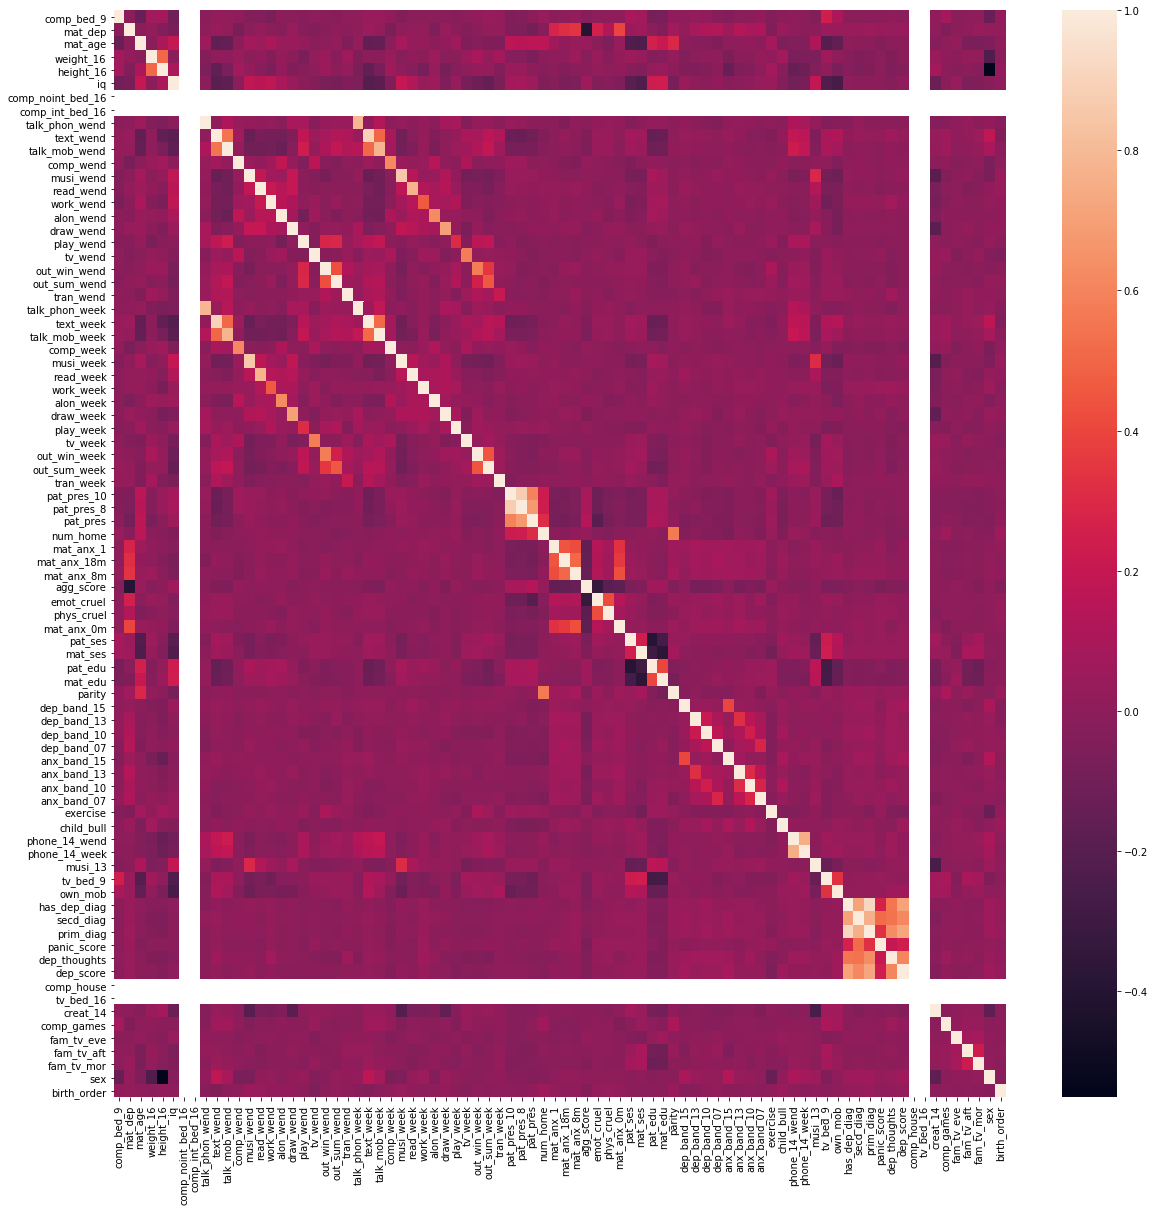

In [15]:
figsave_dir = os.path.join(base_dir, "/Users/Egbert/Desktop/ADS/feature_heatmap.png")

fig = plt.figure(figsize=(20, 20))
ax = sns.heatmap(feature_corr)
plt.savefig(figsave_dir, bbox_inches="tight", facecolor="white")

---

Feature map automation attempt

In [16]:
# nny = ["No", "Yes"]

# for col in obj_df:

#     unique_list = obj_df[col].unique().tolist()

# ##

# test0 = ["Yes", "No", "NaN"]
# test1 = ["NaN", "No", "Yes"]

# if Counter(nny) == Counter(test0):
#     print("yes")

# ##

# obj_df["comp_bed_9"] = obj_df["comp_bed_9"].astype("category")
# obj_df["comp_bed_9_comp"] = obj_df["comp_bed_9"].cat.codes

# obj_df[["comp_bed_9", "comp_bed_9_comp"]]

# ##

# obj_df["tv_bed_16"] = obj_df["tv_bed_16"].astype("category")
# obj_df["tv_bed_16_comp"] = obj_df["tv_bed_16"].cat.codes

# obj_df[["tv_bed_16", "tv_bed_16_comp"]]
    

In [17]:
data_df

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,30.0,59.294132,181.602831,107.0,NaN,NaN,1.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,NaN,9.0,26.0,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,0.0,3.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0
4,0.0,NaN,22.0,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0
5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,NaN,NaN,0.0,4.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,3.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,2.0,1.0,1.0,NaN,3.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,NaN,13.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,0.0
13731,0.0,6.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,NaN,9.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,1.0,0.0
13732,NaN,21.0,37.0,58.075832,169.235565,108.0,NaN,NaN,1.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,2.0,4.0,4.0,0.0,4.0,0.0,NaN,0.0,3.0,1.0,2.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,

---

### Dimensionality reduction 


#### The percentage of NaNs in each column

In [18]:
d1 =data_df.isnull().sum()/len(data_df)*100
d1.sort_values(ascending = False)

comp_noint_bed_16    96.570555
comp_house           94.808504
dep_thoughts         86.857434
comp_int_bed_16      81.287316
tv_bed_16            71.770788
own_mob              68.064657
has_dep_diag         67.139945
secd_diag            67.139945
prim_diag            67.139945
panic_score          67.139945
dep_score            67.139945
out_sum_wend         64.890054
musi_wend            64.824523
work_wend            64.809961
read_wend            64.802679
talk_mob_wend        64.802679
comp_wend            64.766273
text_wend            64.751711
draw_wend            64.744430
out_win_wend         64.693461
play_wend            64.686180
alon_wend            64.686180
talk_phon_wend       64.686180
tv_wend              64.664337
tran_wend            64.606087
exercise             63.805155
child_bull           63.674093
read_week            63.644969
talk_phon_week       63.601281
musi_week            63.572157
text_week            63.564875
out_win_week         63.543032
alon_wee



#### Replace the NaNs with -1

In [19]:
for c in data_df:
    data_df[c] = data_df[c].fillna(-1)
data_df

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.0,3.0,30.0,59.294132,181.602831,107.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,-1.0,9.0,26.0,-1.000000,-1.000000,85.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0
3,-1.0,3.0,24.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,0.0,0.0,0.0,3.0,5.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,0.0,1.0,0.0
4,0.0,-1.0,22.0,49.812426,160.224186,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,1.0,2.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0
5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,-1.0,-1.0,0.0,4.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,3.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,-1.0,2.0,1.0,1.0,-1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,-1.0,13.0,27.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,0.0,0.0
13731,0.0,6.0,29.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,-1.0,9.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,

In [20]:
train_data=np.array(data_df)
train_data

array([[-1.,  3., 30., ...,  2.,  0.,  0.],
       [-1.,  9., 26., ..., -1.,  0.,  1.],
       [-1.,  3., 24., ...,  0.,  1.,  0.],
       ...,
       [-1., 21., 37., ...,  0.,  1.,  0.],
       [ 0., 10., 30., ...,  2.,  1.,  0.],
       [ 0.,  6., 26., ...,  2.,  1.,  0.]])

---
#### Use PCA to reduce dimensionality

In [21]:
def meanX(dataX):
    return np.mean(dataX,axis=0) 


def pca_method(XMat, k):
    average = meanX(XMat)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   
    featValue, featVec=  np.linalg.eig(covX)  
    index = np.argsort(-featValue) 
    finalData = []
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        selectVec = np.matrix(featVec.T[index[:k]]) 
        finalData = data_adjust * selectVec.T
    return finalData

In [22]:
pca_mat=pca_method(train_data,50)
print(pca_mat)
print(np.shape(pca_mat))

[[ 1.32488222e+02 -1.65049226e+00  2.70826596e+00 ... -1.15624310e+00
  -9.38102001e-01 -3.76452761e-01]
 [-5.38463893e+01 -5.52835009e+01 -2.26310824e+00 ...  1.39549047e-02
  -4.82751697e-03 -4.54415922e-02]
 [-8.70458408e+01  2.39445216e+01 -1.49053554e+00 ...  1.20810538e-01
   3.98499618e-04 -4.00142610e-02]
 ...
 [ 1.21938100e+02 -7.31956984e+00  1.15074058e+01 ...  2.88245361e-02
   4.84435219e-01  5.08723907e-01]
 [-4.61896918e+01 -7.23652583e+01  4.88317047e+00 ... -1.26667091e+00
  -1.26891251e+00 -9.89611461e-01]
 [ 1.29606799e+02  3.10962844e+00 -3.08144382e+00 ... -1.33699514e-01
   3.71629397e-01 -1.48950543e-01]]
(13734, 50)



#### sklearn inbuilt PCA function

In [23]:
dataMat = np.array(data_df) 
pca = PCA(n_components='mle')
pca.fit(dataMat)
print(pca.explained_variance_ratio_)

[8.15216348e-01 1.65179739e-01 5.01067544e-03 3.93058951e-03
 2.68109493e-03 2.15958394e-03 1.49174324e-03 5.74003236e-04
 5.49277720e-04 4.77109808e-04 2.81807285e-04 2.49047742e-04
 1.90528940e-04 1.65715000e-04 1.41904179e-04 1.10208340e-04
 1.02465216e-04 8.99704912e-05 8.71535079e-05 7.35728689e-05
 6.38674189e-05 6.22392996e-05 5.74611885e-05 5.26395076e-05
 4.66648811e-05 4.51635054e-05 4.40050548e-05 4.02948823e-05
 3.94171266e-05 3.88927182e-05 3.85913101e-05 3.41766402e-05
 3.36268905e-05 3.26134204e-05 3.18776404e-05 3.02663174e-05
 2.90393012e-05 2.73039335e-05 2.72353667e-05 2.66634353e-05
 2.58512603e-05 2.32254725e-05 2.25233089e-05 2.22169705e-05
 2.05614410e-05 1.98673631e-05 1.75351000e-05 1.67812143e-05
 1.66359552e-05 1.59742615e-05 1.43754275e-05 1.42404124e-05
 1.34674502e-05 1.31722247e-05 1.19892099e-05 1.13167443e-05
 1.05870429e-05 1.01229999e-05 1.00012800e-05 9.49853111e-06
 9.36053086e-06 8.87924825e-06 8.68798497e-06 8.30881091e-06
 8.07774646e-06 7.702985